In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle
from helpers import *


(50, 11)
(50, 11)
(50, 11)
(50, 11)
(50, 11)
(50, 11)
(50, 11)
(50, 11)
(50, 11)
(50, 11)
(50, 11)
(50, 11)


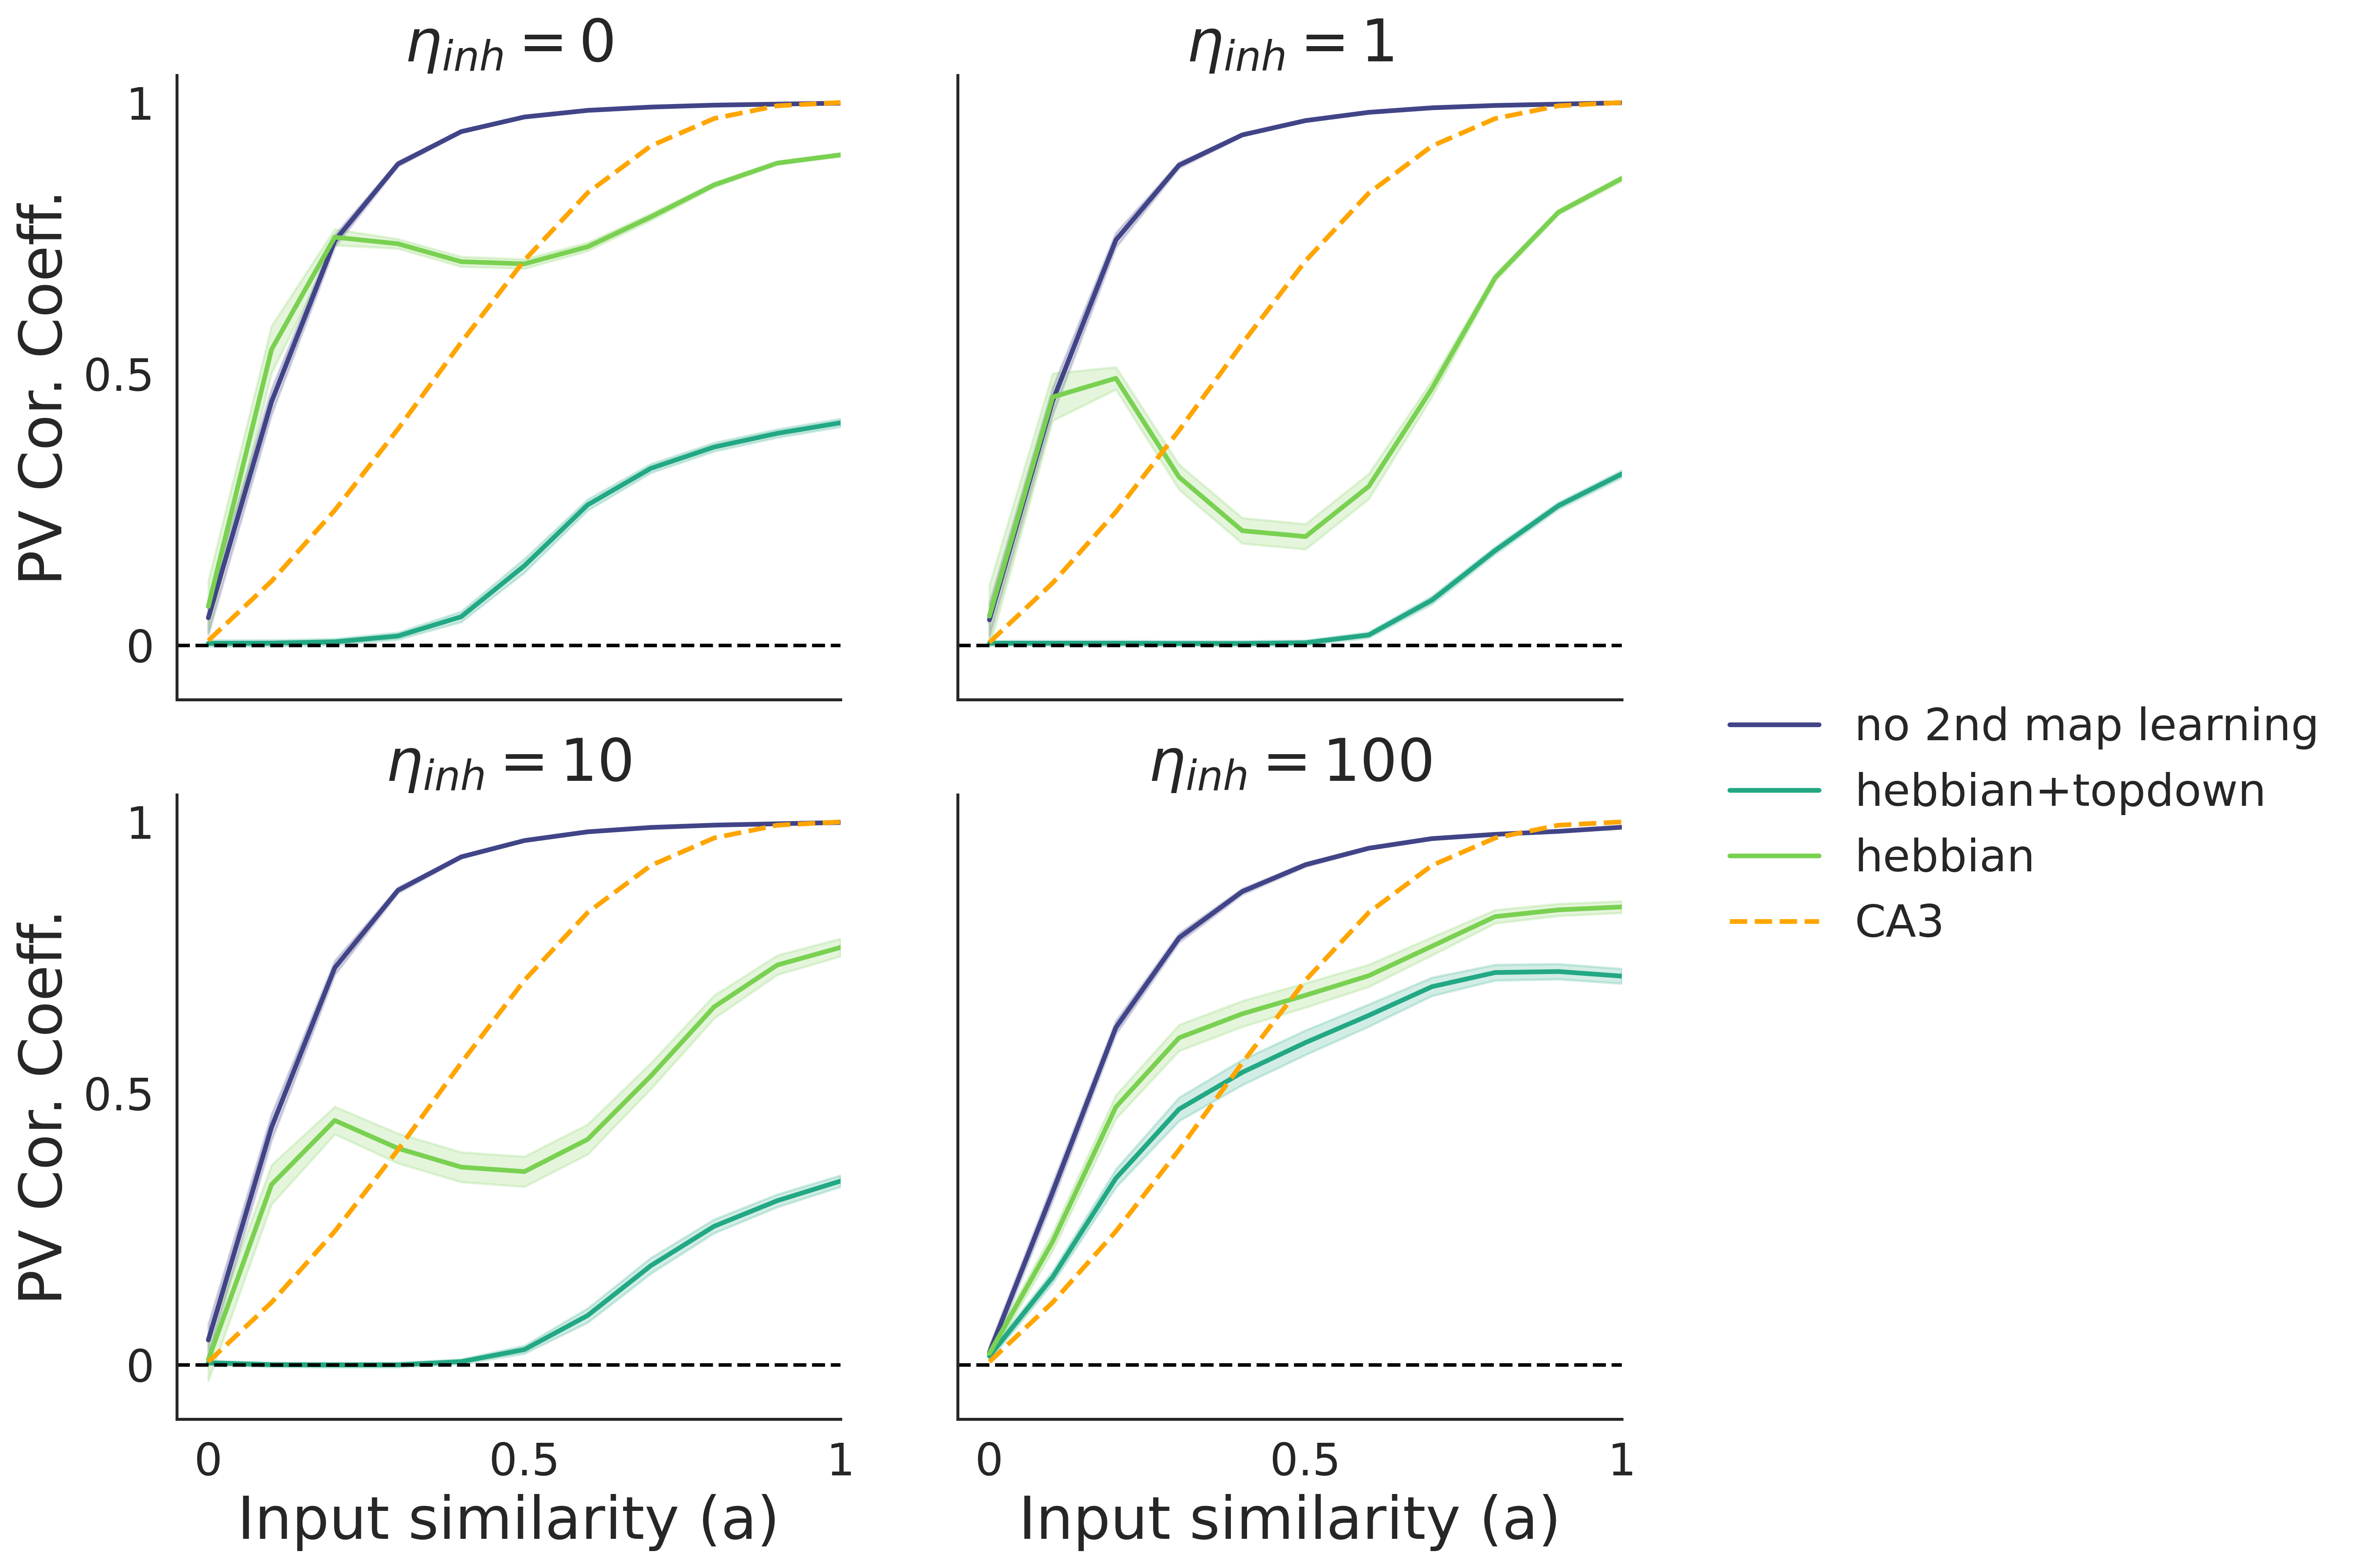

In [2]:

sns.set(style="white", font_scale=1.2)

fs = 25

# Define color palette
# Use a color palette based on 'viridis' for consistency, but pick distinct colors for each group
viridis_palette = sns.color_palette("viridis", 4)
COLORS = {
    ('False', 'False'): viridis_palette[0],
    ('True', 'True'): viridis_palette[2],
    ('False', 'True'): viridis_palette[3],
    'CA3': 'orange'  # Keep CA3 as orange for contrast
}

fig, axs = plt.subplots(2, 2, figsize=(10, 10), sharey=True, sharex=True, dpi=400)
axs = axs.flatten()  # Flatten the 2D array of axes for easier iteration

for idx, inh_plast in enumerate(['False_lrinh_False', 'True_lrinh_1', 'True_lrinh_10', 'True_lrinh_100']):
    # TODO: Maybe i'll mash these two together into one plot
    all_cors = {'False_False': [], 'True_True': [], 'False_True': []}
    all_cors_ca3 = []
    ax = axs[idx]
    

    for i in range(50):  # TODO: Change to 50 once all simulations are done
        cors, cors_ca3 = {}, []
        aas = np.arange(0, 1.1, 0.1).round(1)  # Use the same aas for all simulations

        for key in all_cors.keys():
            cors[key] = []
            for a in aas:
            
                k1, k2 = key.split('_')
                with open(f"simulations/data/test_similarities_test2/pv_corr_vs_similarity_a_inh_plast_{inh_plast}_sim_{i}/a_{a}_top_down_{k1}_plasticity_{k2}.pkl", 'rb') as f:
                # with open(f"../plots/test_similarities/pv_corr_vs_similarity_inh_plast_{inh_plast}_sim_{i}.pkl", 'rb') as f:
                    results = pickle.load(f)
                cors[key].append(np.nanmean(results[0]))
                if key == 'False_False':
                    cors_ca3.append(np.nanmean(results[1]))

        for key in cors:
            all_cors[key].append(cors[key])
        all_cors_ca3.append(cors_ca3)

    # fig, ax = plt.subplots(figsize=(6, 6), dpi=300)
    for j, (key_str, cor_list) in enumerate(all_cors.items()):
        k1, k2 = key_str.split('_')
        color = COLORS[(k1, k2)]

        print(np.array(cor_list).shape)

        m = np.nanmean(cor_list, axis=0)
        sem = np.nanstd(cor_list, axis=0) / np.sqrt(len(cor_list))
    
        label = ['no 2nd map learning', 'hebbian+topdown', 'hebbian'][j] if idx == 0 else None
        ax.plot(aas, m, label=label, color=color, linewidth=2)
        ax.fill_between(aas, m - sem, m + sem, color=color, alpha=0.2)
        ax.set_ylabel(' ', fontsize=fs)  # Clear ylabel for all but the first subplot

    # Add CA3 as a baseline (no SEM, since not averaged)
    label = 'CA3' if idx == 0 else None
    ax.plot(aas, np.mean(all_cors_ca3, axis=0), label=label, color=COLORS['CA3'], linestyle='--', linewidth=2)

    # Aesthetic settings
    if idx > 1:
        ax.set_xlabel('Input similarity (a)', fontsize=fs)
    plast_str = '0' if inh_plast.split('_')[2] == 'False' else inh_plast.split('_')[2]
    ax.set_title(r'$\eta_{inh} = ' + (plast_str)  + r'$', fontsize=fs)
    ax.set_xticks([0,.5,1])
    ax.set_yticks([0, 0.5, 1])
    ax.set_xticklabels([0, .5, 1], fontsize=fs//1.3)
    ax.set_yticklabels([0, .5, 1], fontsize=fs//1.3)
    ax.hlines([0], xmin=-.05, xmax=1, color='black', linestyle='--', linewidth=1.5)
    ax.set_ylim(-0.1, 1.05)
    ax.set_xlim(-.05, 1)

axs[0].set_ylabel('PV Cor. Coeff.', fontsize=fs)
axs[2].set_ylabel('PV Cor. Coeff.', fontsize=fs)


fig.legend(frameon=False, loc='center left', bbox_to_anchor=(1.01, 0.5), ncol=1, fontsize=fs//1.3)
sns.despine()
plt.tight_layout(rect=[0, 0.05, 1, 1])  # Leave space at bottom for the legend
plt.show()
plt.close()


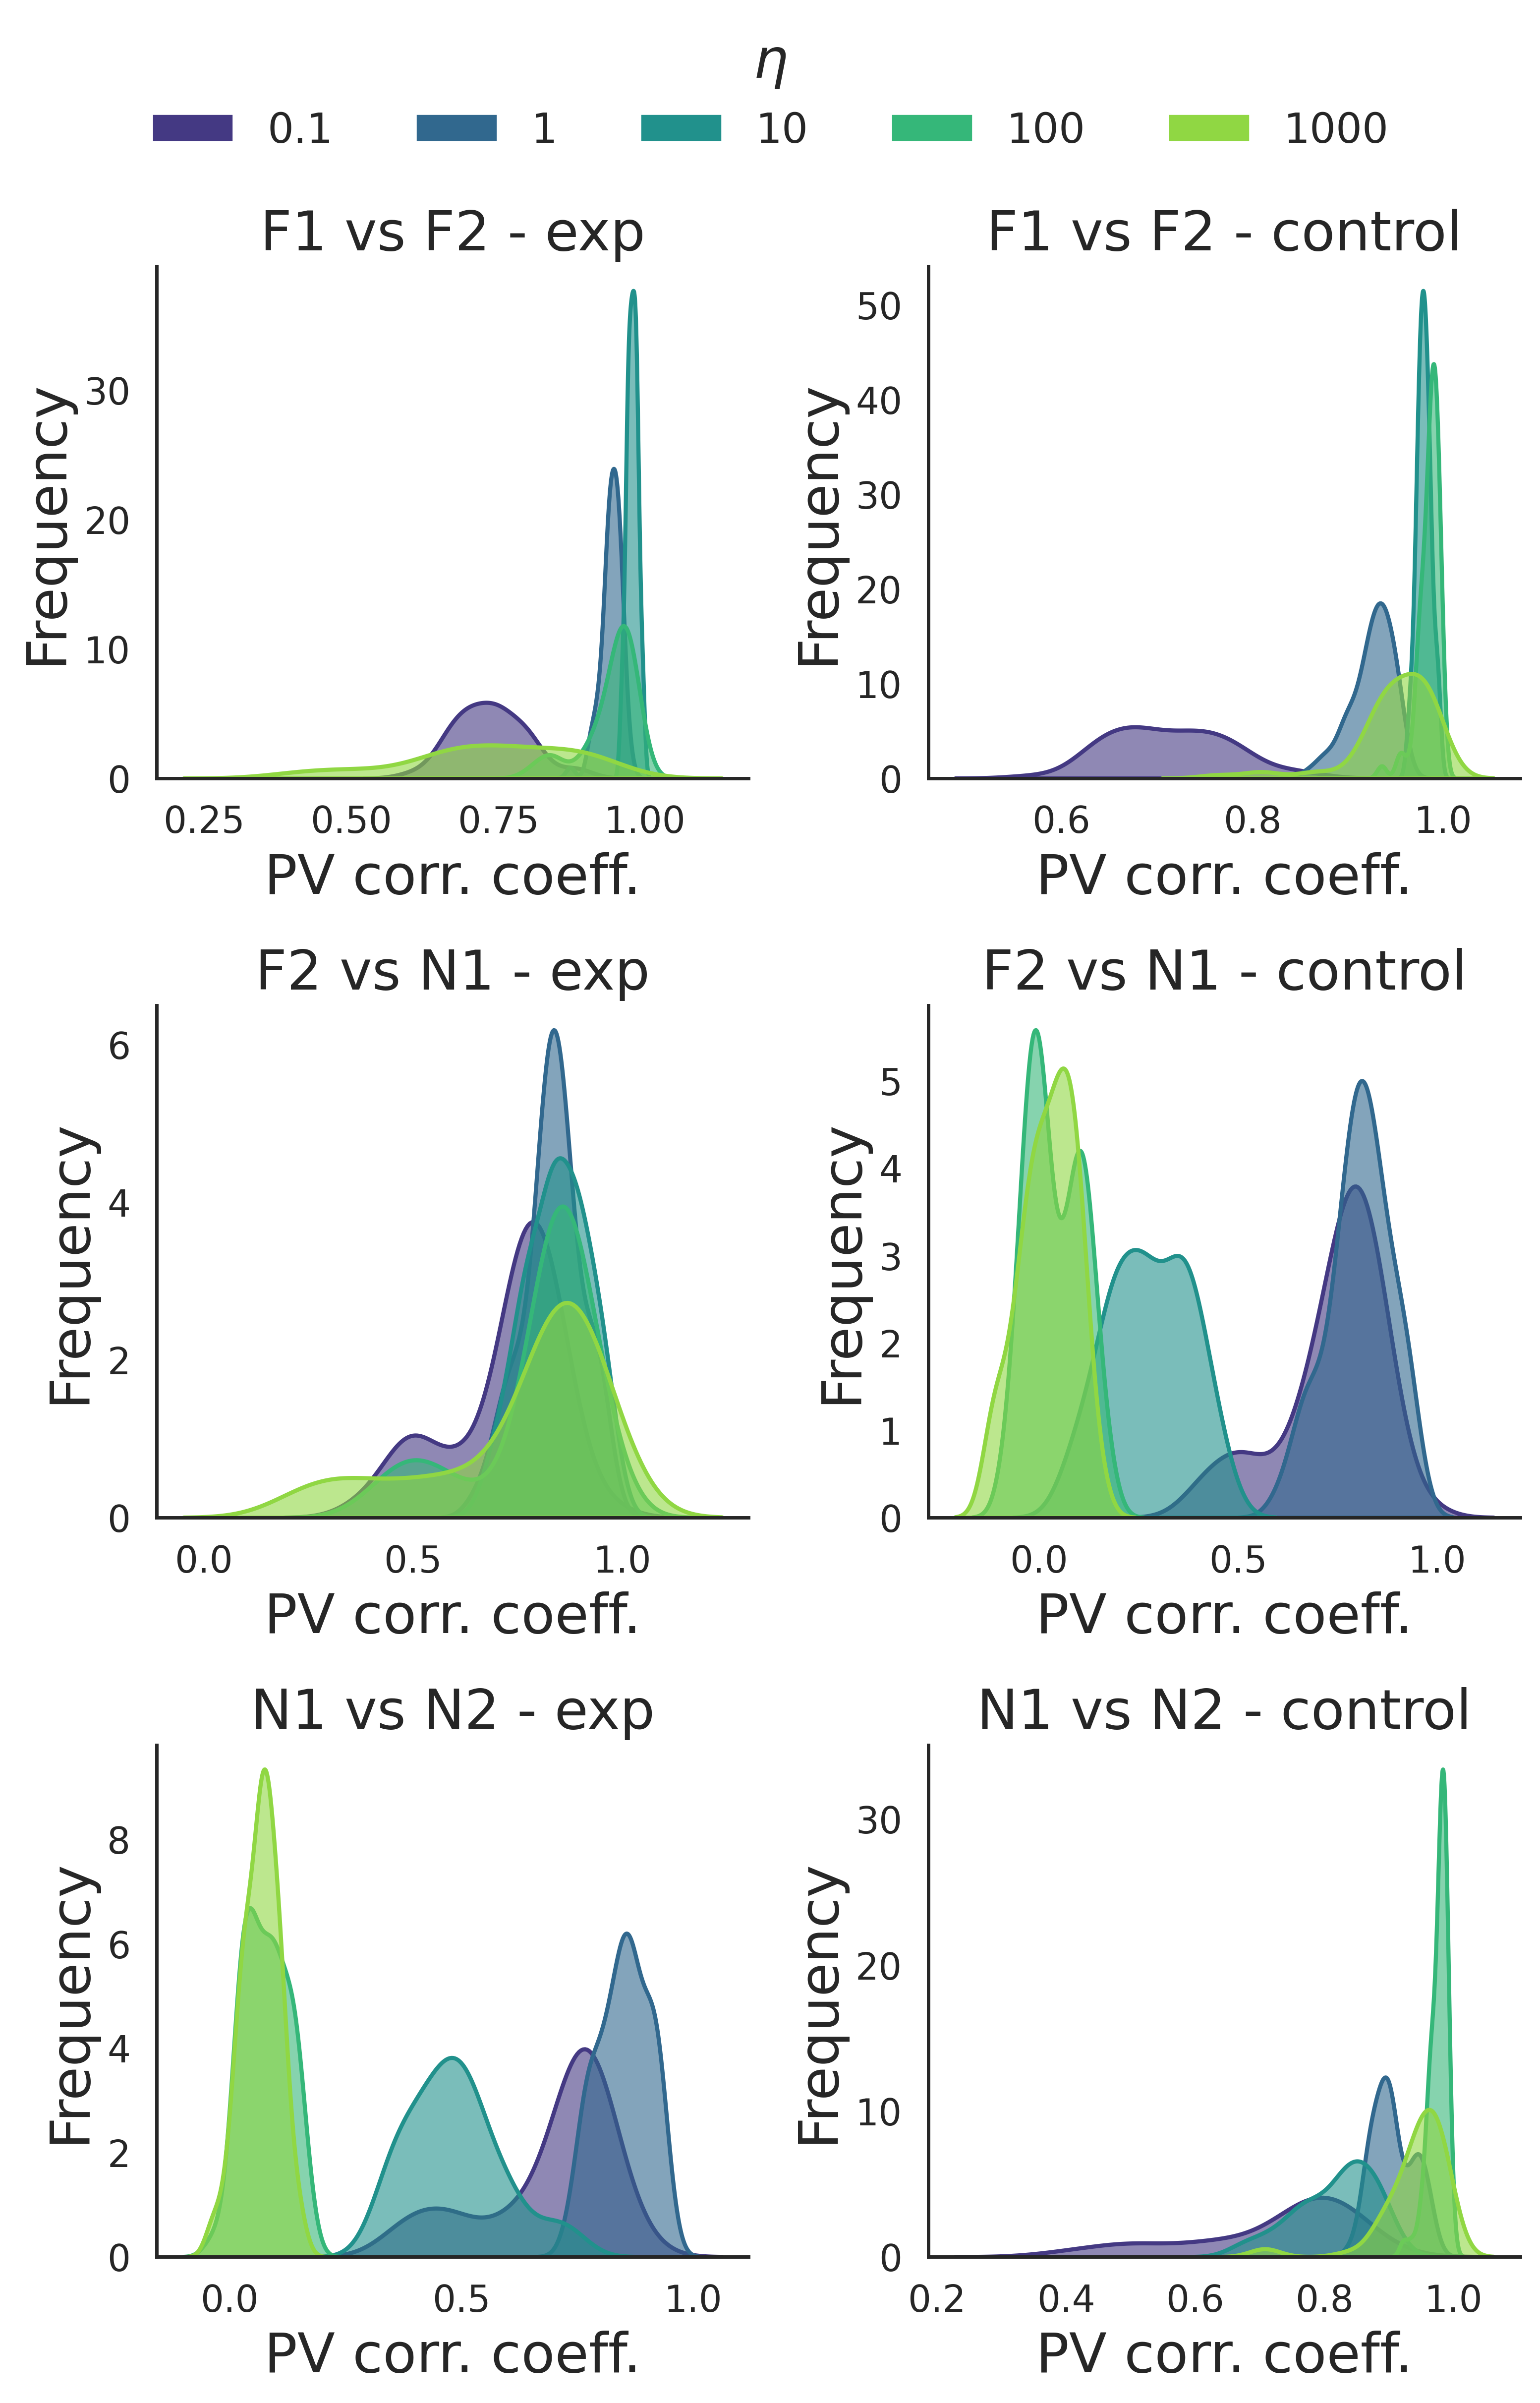

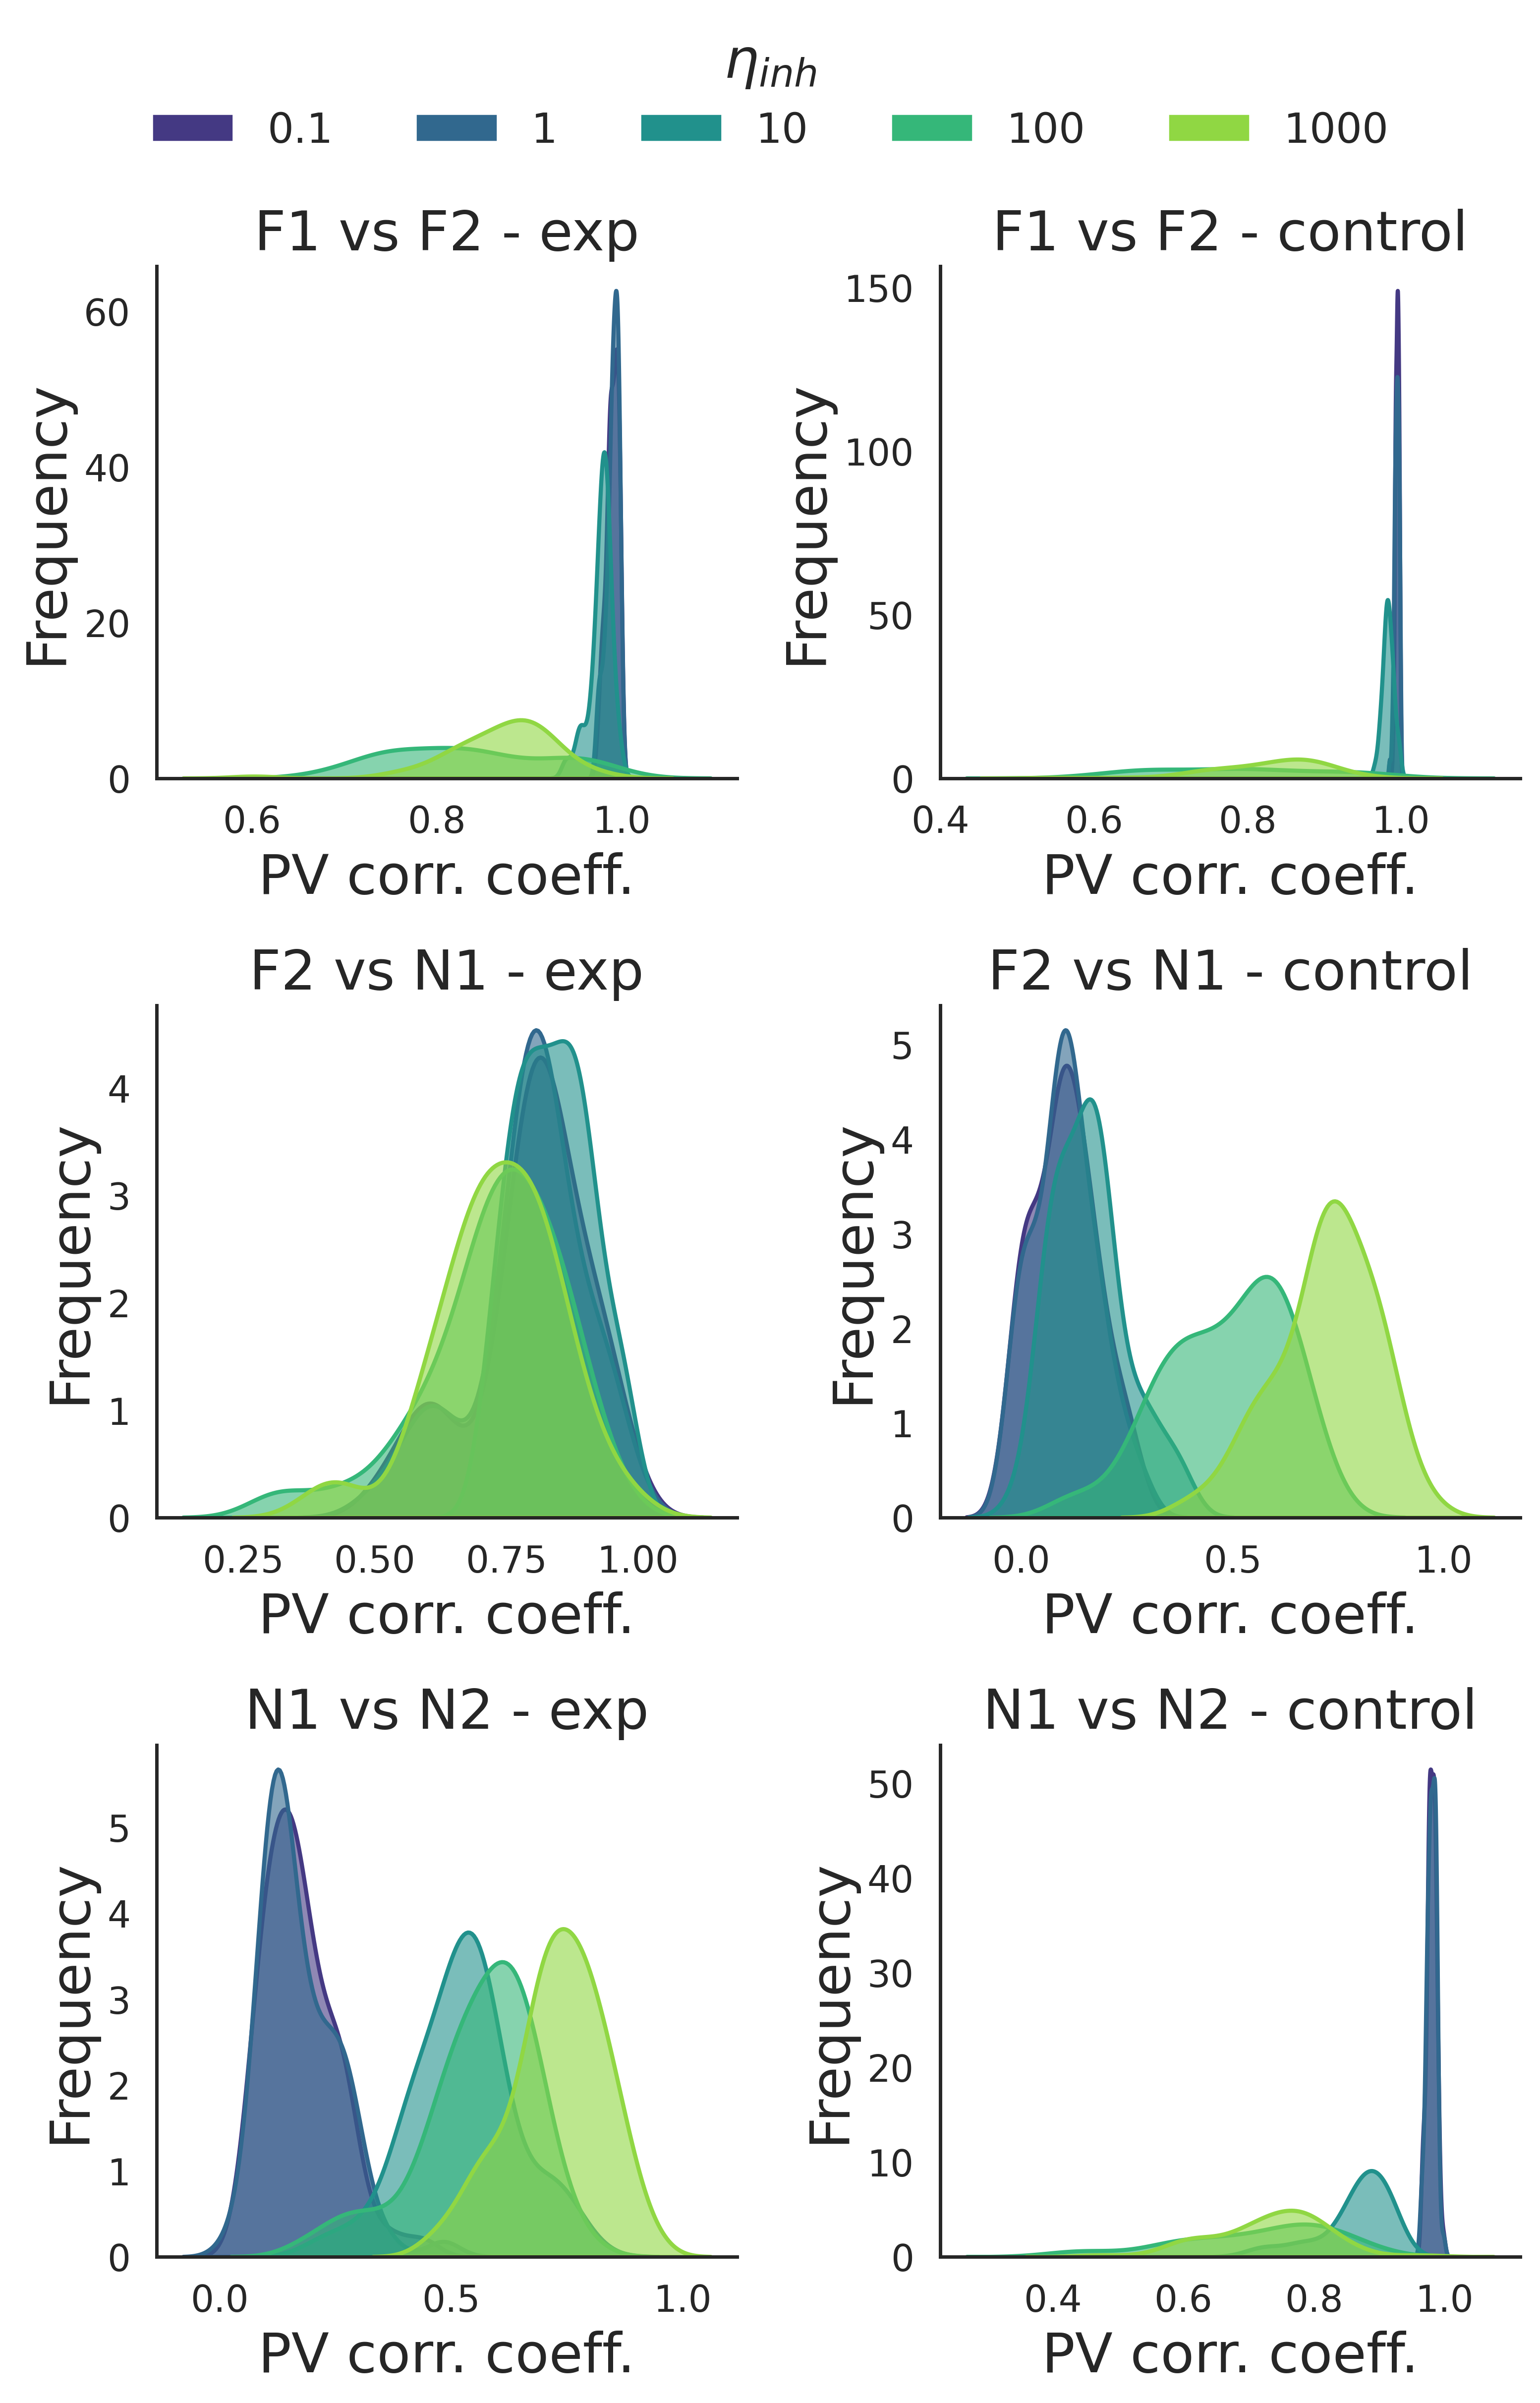

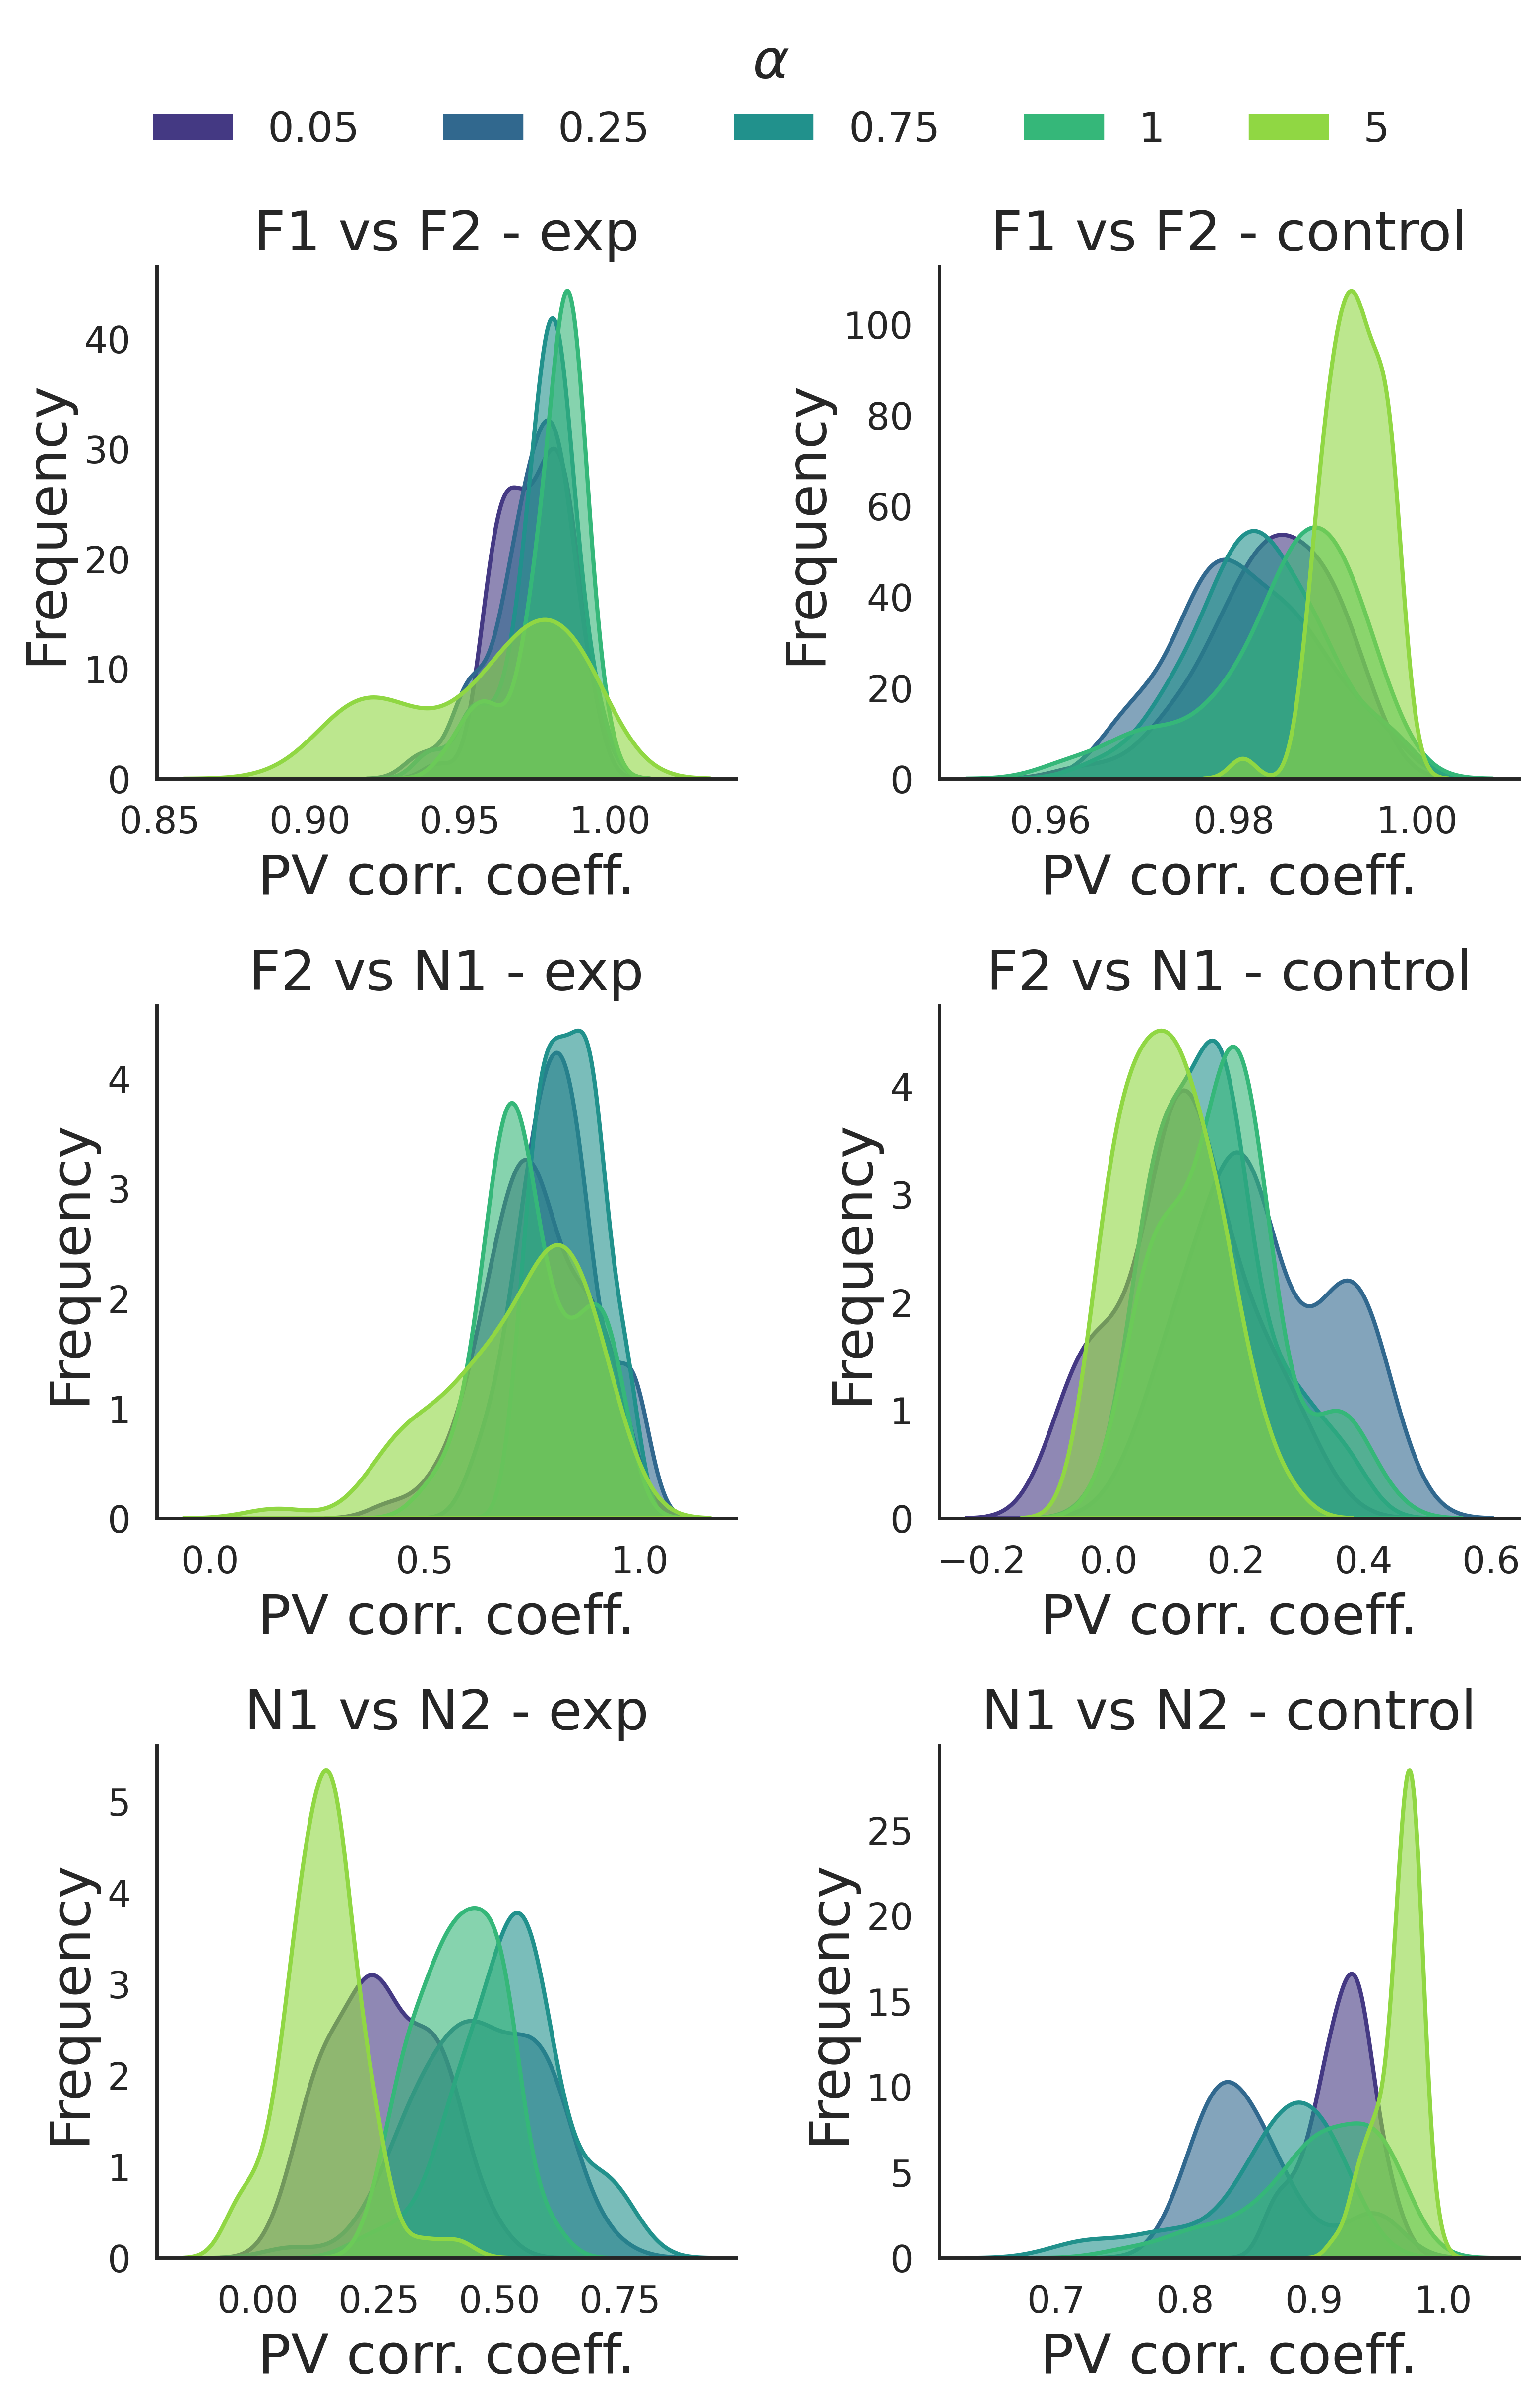

In [3]:

    
params = {
        # TODO: See which values show nice effect
        'lr': [0.1, 1, 10, 100, 1000],
        'lr_inh': [0.1, 1, 10, 100, 1000],
        'alpha': [0.05, 0.25, 0.75, 1, 5],
    }

param_names = {
    'lr': r'$\eta$',
    'lr_inh': r'$\eta_{inh}$',
    'alpha': r'$\alpha$',
}

pvs_per_param = {}

for param, values in params.items():
    pvs_per_param[param] = {}

    for value in values:
        with open(f"simulations/data/1d_2envs_test/act_maps_and_pvs_inh_{param}_{value}.pkl", 'rb') as f:
            amp = pickle.load(f)

        pvs_per_param[param][value] = (amp['pvs_per_condition']['exp'], amp['pvs_per_condition']['control'])


for param_idx, param in enumerate(params.keys()):
    fig, axs = plt.subplots(3, 2, figsize=(8, 12), dpi=400)  ## TODO: Maybe Instead i will do 3 plots of 3x2 but let's see how this looks first
    for con_idx, condition in enumerate(['exp', 'control']):
        for i, comp in enumerate([('F1', 'F2'), ('F2', 'N1'), ('N1', 'N2')]):

            ax = axs[i, con_idx]
            
            all_pvs = []
            for value in params[param]:
                pvs = pvs_per_param[param][value][con_idx][i]
                all_pvs.append(pvs)


            # Use seaborn's color_palette to generate a nice palette of the required length
            colors = sns.color_palette("viridis", len(all_pvs))

            plot_pv_corr_distributions(all_pvs, out1=comp[0], out2=f'{comp[1]} - {condition}',
                                       ax=ax, p=None, colors=colors)

    # Create shared legend
    legend_elements = [
        Patch(facecolor=colors[i], label=params[param][i]) for i in range(len(colors))
    ]

    fig.legend(
        handles=legend_elements,
        title=param_names[param],
        loc='upper center',
        bbox_to_anchor=(0.5, 1.02),
        ncol=len(colors),
        fontsize=15,
        title_fontsize=20,
        frameon=False
    )

    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space at top for the legend
    # plt.show()
    plt.savefig(f'pv_corr_distributions_{param}.png', dpi=800)

    

-0.08467755453086945 0.952269324594899
0.21003136201747497
0.5585360728578885
0.5773469782065374
0.5976121733204467


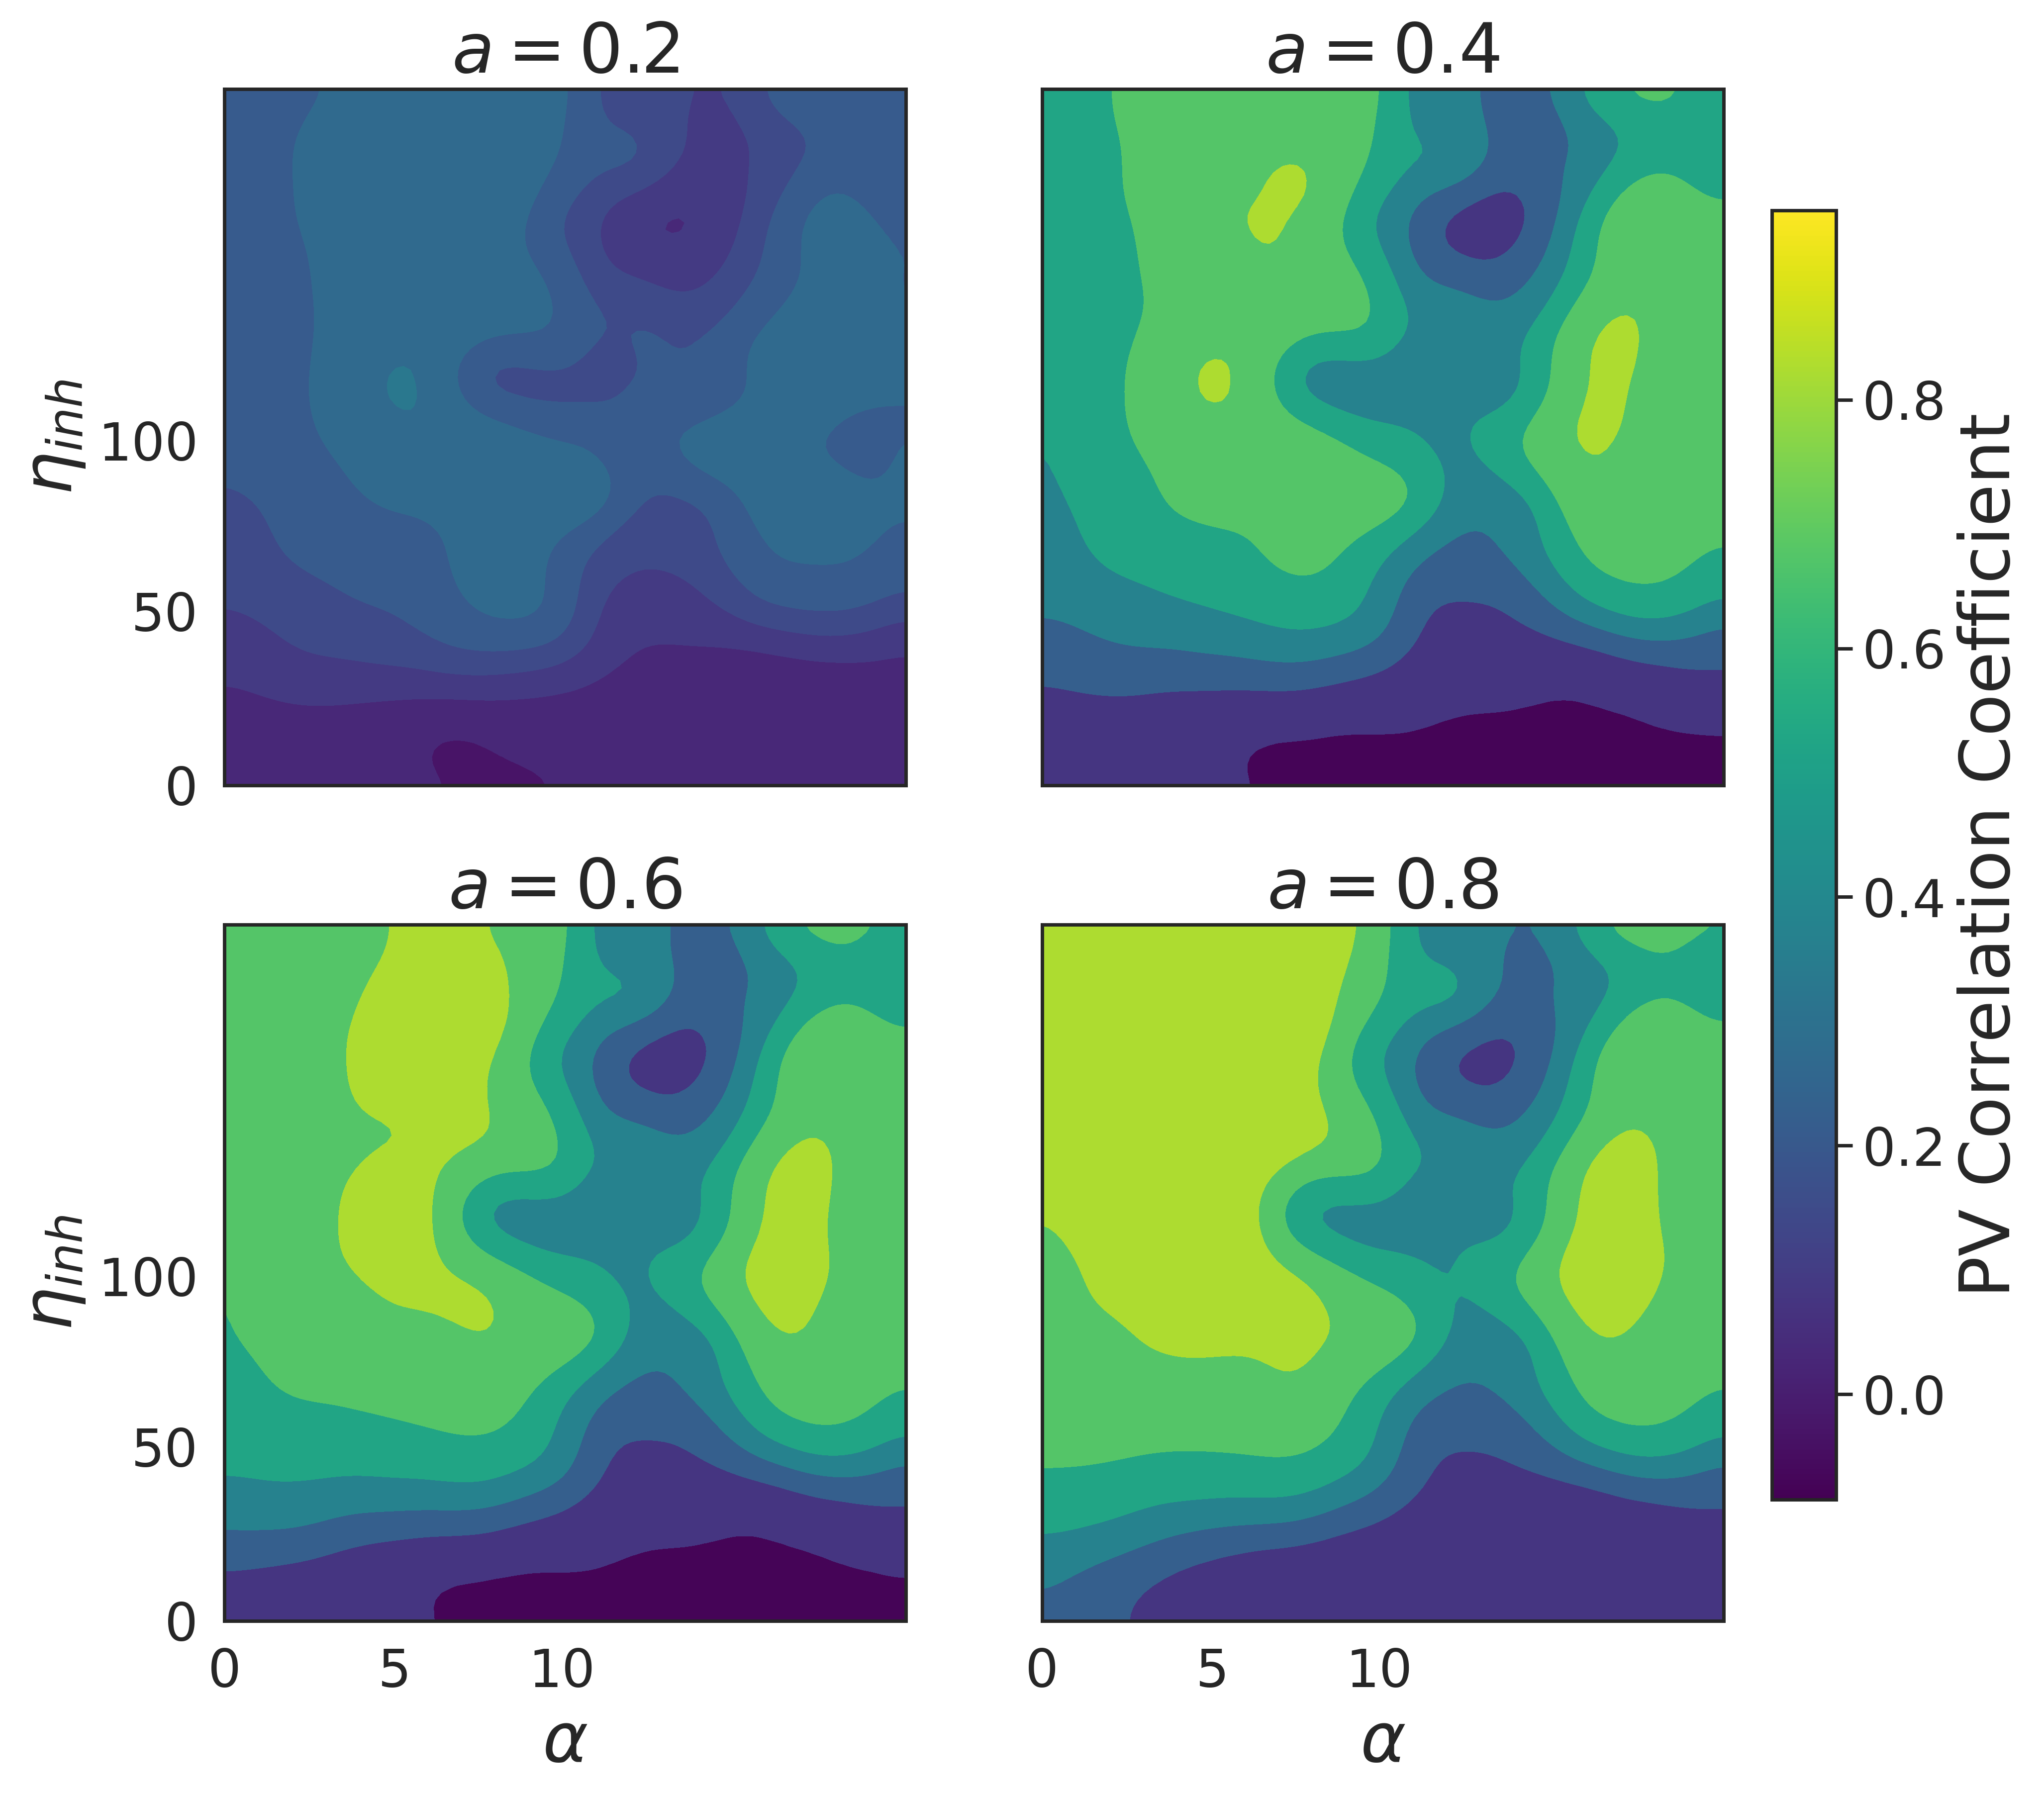

0.632636194447242 [0.76923219 0.75759295 0.72612211 0.78514151 0.71194488 0.69859415
 0.65102379 0.65926322 0.56009334 0.62080697 0.62376432 0.57574854
 0.60612986 0.51479334 0.5412924  0.51806726 0.43572578 0.4673618
 0.41590712 0.48414337 0.3102323  0.28138378 0.24516237 0.167855
 0.13669995 0.14612724 0.13066844 0.23853941 0.25833158 0.44441944
 0.45539492 0.61364402 0.6789755  0.66916282 0.5668215  0.52394794
 0.55890864 0.56946026 0.69037061 0.76328619 0.74589485 0.78873882
 0.80643475 0.79482441 0.80467371 0.88679446 0.87113454 0.78589945
 0.80611605 0.72832423 0.86558283 0.79957446 0.87108861 0.87386423
 0.90865268 0.8564224  0.85136008 0.75440093 0.72704994 0.72659535
 0.87409618 0.90436281 0.94626383 0.93842604]


In [5]:
from scipy.ndimage import gaussian_filter

## TODO: I will probably need better resolution here but do this for now
lr_inhs = np.arange(0, 200, 2).round(1) 
alphas = np.arange(0, 20, .2).round(1)  # Example range for alpha
aas = [0.2, 0.4, 0.6, 0.8]  # Example range for a


outs = {}


for a in aas:
    out = np.zeros((len(lr_inhs), len(alphas)))
    for i, lr_inh in enumerate(lr_inhs):
        for j, alpha in enumerate(alphas):
            out_file = f'simulations/data/test_plast/{a}/pv_corr_lr_inh_{lr_inh}_alpha_{alpha}.pkl'
            with open(out_file, 'rb') as f:
                pv_corr = pickle.load(f)
            mean_pv_corr = np.nanmean(pv_corr)
            out[i, j] = mean_pv_corr
    outs[a] = out

    # plt.figure(figsize=(6, 6), dpi=400)
    # sns.heatmap(out, annot=False, fmt=".2f", cmap="viridis", 
    #             xticklabels=alphas, yticklabels=lr_inhs)

fs = 25

vmin = np.nanmin([np.nanmin(outs[a]) for a in aas])
vmax = np.nanmax([np.nanmax(outs[a]) for a in aas])

print(vmin, vmax)

fig, axs = plt.subplots(len(aas)//2, len(aas)//2, figsize=(12, 10), sharey=True, sharex=True, dpi=400)
axs = axs.flatten()  # Flatten the 2D array of axes for easier iteration
axs[0].set_ylabel(r'$\eta_{inh}$', fontsize=fs)
axs[2].set_ylabel(r'$\eta_{inh}$', fontsize=fs)

for a, ax in zip(aas, axs):
    # Apply Gaussian smoothing to the output matrix
    out_smoothed = gaussian_filter(outs[a], sigma=4)

    # plt.contourf(alphas, lr_inhs, out, cmap='viridis', levels=10)
    im = ax.contourf(out_smoothed, cmap='viridis', vmax=vmax, vmin=vmin, levels=5,
                   extent=[alphas[0], alphas[-1], lr_inhs[-1], lr_inhs[0]], origin ='upper') #, interpolation='nearest')
    # ims.append(im)
    ax.set_title(fr'$a = {a}$', fontsize=fs)
    if a == aas[-1] or a == aas[-2]:
        ax.set_xlabel(r'$\alpha$', fontsize=fs)
    if a == aas[0] or a == aas[2]:
        ax.set_yticks([1, 50, 98])
        ax.set_yticklabels([0, 50, 100], fontsize=fs//1.3)

    ax.set_xticks([.1, 5, 9.8])
    ax.set_xticklabels([0, 5, 10], fontsize=fs//1.3)

    # plt.colorbar(label='PV Correlation Coefficient')
    # Use constrained_layout instead of tight_layout for better colorbar placement
    print(out_smoothed[-1,-1])


plt.subplots_adjust(right=0.8)  # Make space for colorbar
cbar = fig.colorbar(
    plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=vmin, vmax=vmax)),
    ax=axs,
    orientation='vertical',
    fraction=0.04,  # increased from 0.02 to make it bigger
    pad=0.03,
)
cbar.set_label('PV Correlation Coefficient', fontsize=fs)
cbar.ax.tick_params(labelsize=fs//1.3)
plt.show()

print(out[-1,-1], pv_corr)